# Exploratory Data Analysis

In [1]:
## Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import sktime
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.fbprophet import Prophet

In [2]:
## Create dataframe using ecommerce_dataset.csv
ecommerce_df = pd.read_csv("DataSource/ecommerce_dataset.csv")
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
## See count of rows in dataframe
len(ecommerce_df)

541909

In [4]:
## Remove rows where orders were cancelled - InvoiceNo starts with "C"
ecommerce_df = ecommerce_df.drop(ecommerce_df[ecommerce_df["InvoiceNo"].str.startswith("C")].index)

In [5]:
## See count after removing rows in dataframe
len(ecommerce_df)

532621

In [6]:
## Add Column that calculates OrderAmount
ecommerce_df["OrderAmount"] = ecommerce_df.Quantity * ecommerce_df.UnitPrice
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
## Review Datatypes
ecommerce_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
OrderAmount    float64
dtype: object

In [8]:
## Calculate OrderAmount Sum and Order Quantity Sum by Country
country_order_amount = ecommerce_df.groupby(["Country"]).sum()["OrderAmount"].reset_index()
country_quantity = ecommerce_df.groupby(["Country"]).sum()["Quantity"].reset_index()
country_order_amount.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/211037963.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_order_amount = ecommerce_df.groupby(["Country"]).sum()["OrderAmount"].reset_index()
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/211037963.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_quantity = ecommerce_df.groupby(["Country"]).sum()["Quantity"].reset_index()


,Country,OrderAmount
0,Australia,138521.31
1,Austria,10198.68
2,Bahrain,754.14
3,Belgium,41196.34
4,Brazil,1143.60


In [9]:
## Create new dataframes for Country sum calculations
OrderAmount_df = pd.DataFrame(country_order_amount, columns=["Country", "OrderAmount"])
Quantity_df = pd.DataFrame(country_quantity, columns=["Country", "Quantity"])
OrderAmount_df.head()

,Country,OrderAmount
0,Australia,138521.31
1,Austria,10198.68
2,Bahrain,754.14
3,Belgium,41196.34
4,Brazil,1143.60


In [10]:
## Create new dataframe to show unique Orders by Country
InvoiceNo_Country_count_df = ecommerce_df.groupby("Country")["InvoiceNo"].nunique().reset_index()
InvoiceNo_Country_count_df.head()

,Country,InvoiceNo
0,Australia,57
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1


In [11]:
## Merge dataframes into a single dataframe
country_sum_df = pd.merge(pd.merge(OrderAmount_df, Quantity_df, how="left", on=["Country", "Country"]), InvoiceNo_Country_count_df, on=["Country", "Country"])

country_sum_df

,Country,OrderAmount,Quantity,InvoiceNo
0,Australia,138521.310,84209,57
1,Austria,10198.680,4881,17
2,Bahrain,754.140,314,3
3,Belgium,41196.340,23237,98
4,Brazil,1143.600,356,1
5,Canada,3666.380,2763,6
6,Channel Islands,20450.440,9491,26
7,Cyprus,13590.380,6361,16
8,Czech Republic,826.740,671,2
9,Denmark,18955.340,8235,18


In [12]:
## Review datatypes of dataframe
country_sum_df.dtypes

Country         object
OrderAmount    float64
Quantity         int64
InvoiceNo        int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

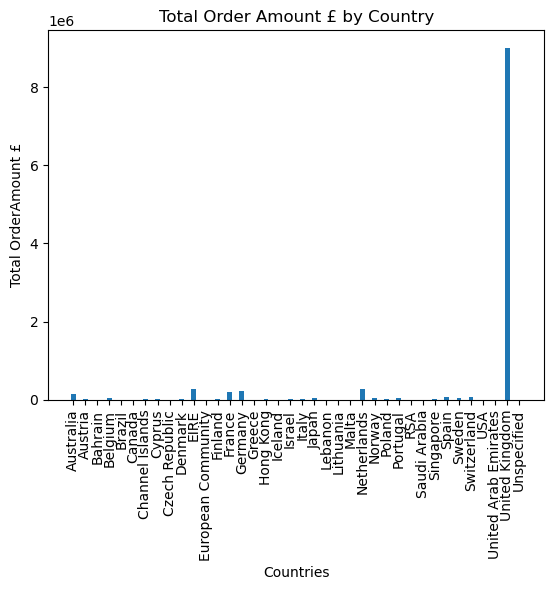

In [13]:
## Create bar char that shows Order Amount Sum by Country
plt.bar(country_sum_df["Country"], country_sum_df["OrderAmount"], width = 0.4)
plt.xlabel("Countries")
plt.ylabel("Total OrderAmount £")
plt.title("Total Order Amount £ by Country")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

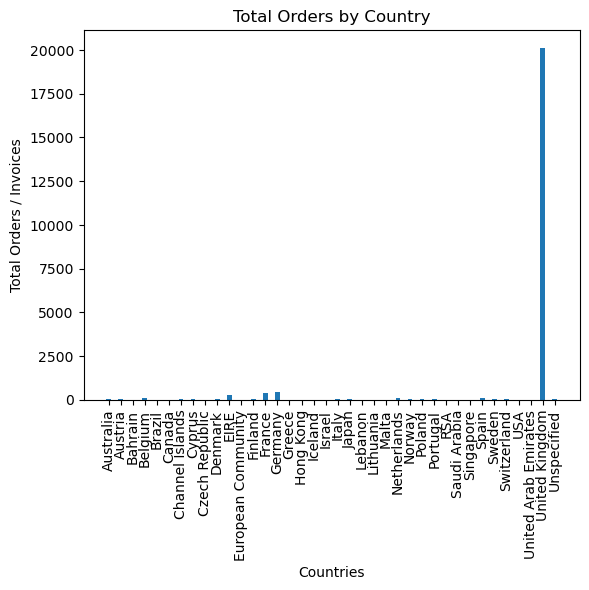

In [14]:
## Create bar char that shows Order Amount Sum by Country
plt.bar(country_sum_df["Country"], country_sum_df["InvoiceNo"], width = 0.4)
plt.xlabel("Countries")
plt.ylabel("Total Orders / Invoices")
plt.title("Total Orders by Country")
plt.xticks(rotation=90)
plt.show

In [15]:
## Find average OrderAmount and Quantity by Country
order_amount = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["OrderAmount"].reset_index()
quantity = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["Quantity"].reset_index()
avg_order_amount = order_amount.groupby(["Country"]).mean()["OrderAmount"].reset_index()
avg_quantity = quantity.groupby(["Country"]).mean()["Quantity"].reset_index()
avg_quantity.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/4241387504.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_amount = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["OrderAmount"].reset_index()
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/4241387504.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["Quantity"].reset_index()
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/4241387504.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a 

,Country,Quantity
0,Australia,1477.350877
1,Austria,287.117647
2,Bahrain,104.666667
3,Belgium,237.112245
4,Brazil,356.000000


In [16]:
## Round values to shorten decimals
avg_quantity.Quantity = avg_quantity.Quantity.round(0)
avg_order_amount.OrderAmount = avg_order_amount.OrderAmount.round(2)
avg_quantity.head()

,Country,Quantity
0,Australia,1477.0
1,Austria,287.0
2,Bahrain,105.0
3,Belgium,237.0
4,Brazil,356.0


<function matplotlib.pyplot.show(close=None, block=None)>

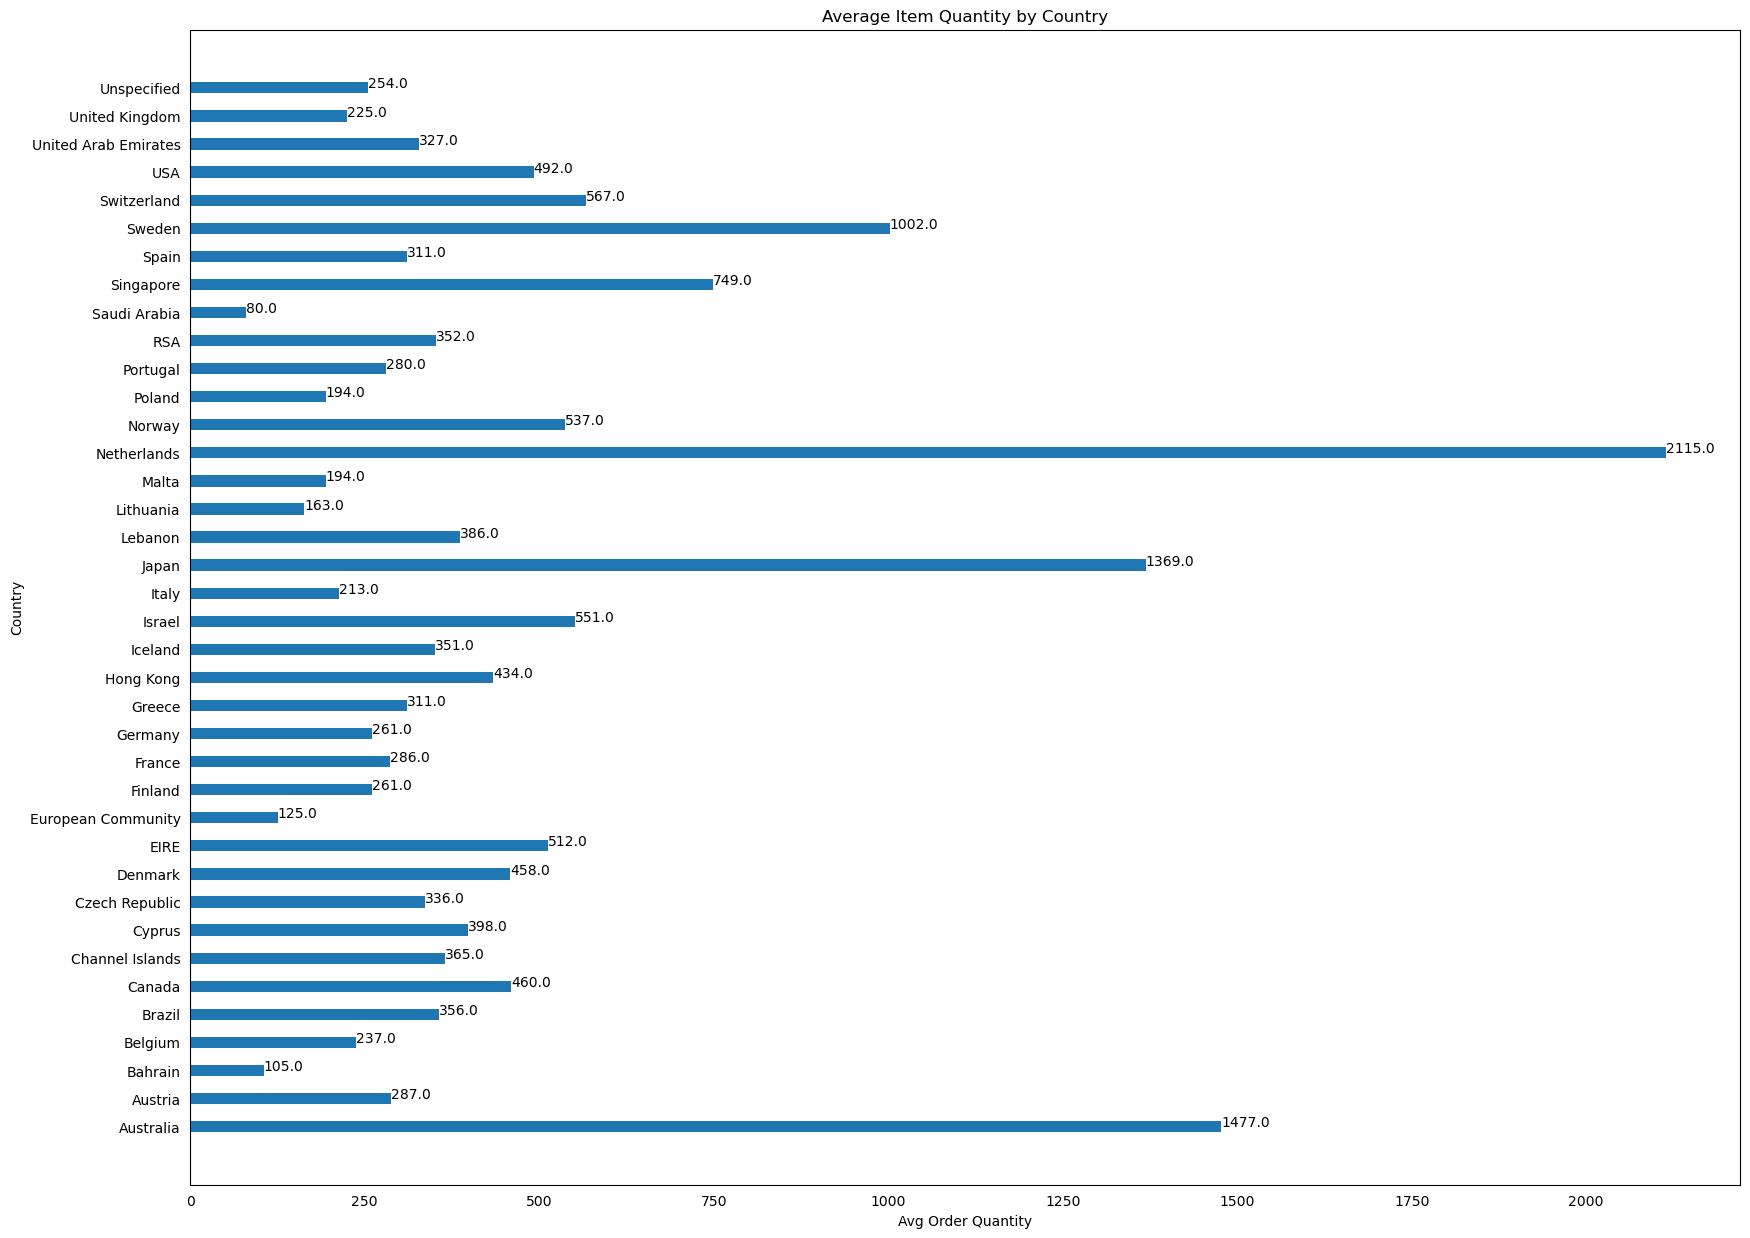

In [17]:
## Create bar char that shows average Order Quantity by Country        
plt.figure(figsize = (20,15))
plt.barh(avg_quantity["Country"], avg_quantity["Quantity"], height = 0.4)
plt.xlabel("Avg Order Quantity")
plt.ylabel("Country")
plt.title("Average Item Quantity by Country")
plt.tick_params(bottom = False, left = False)

for index, value in enumerate(avg_quantity["Quantity"]):
    plt.text(value, index,
             str(value))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

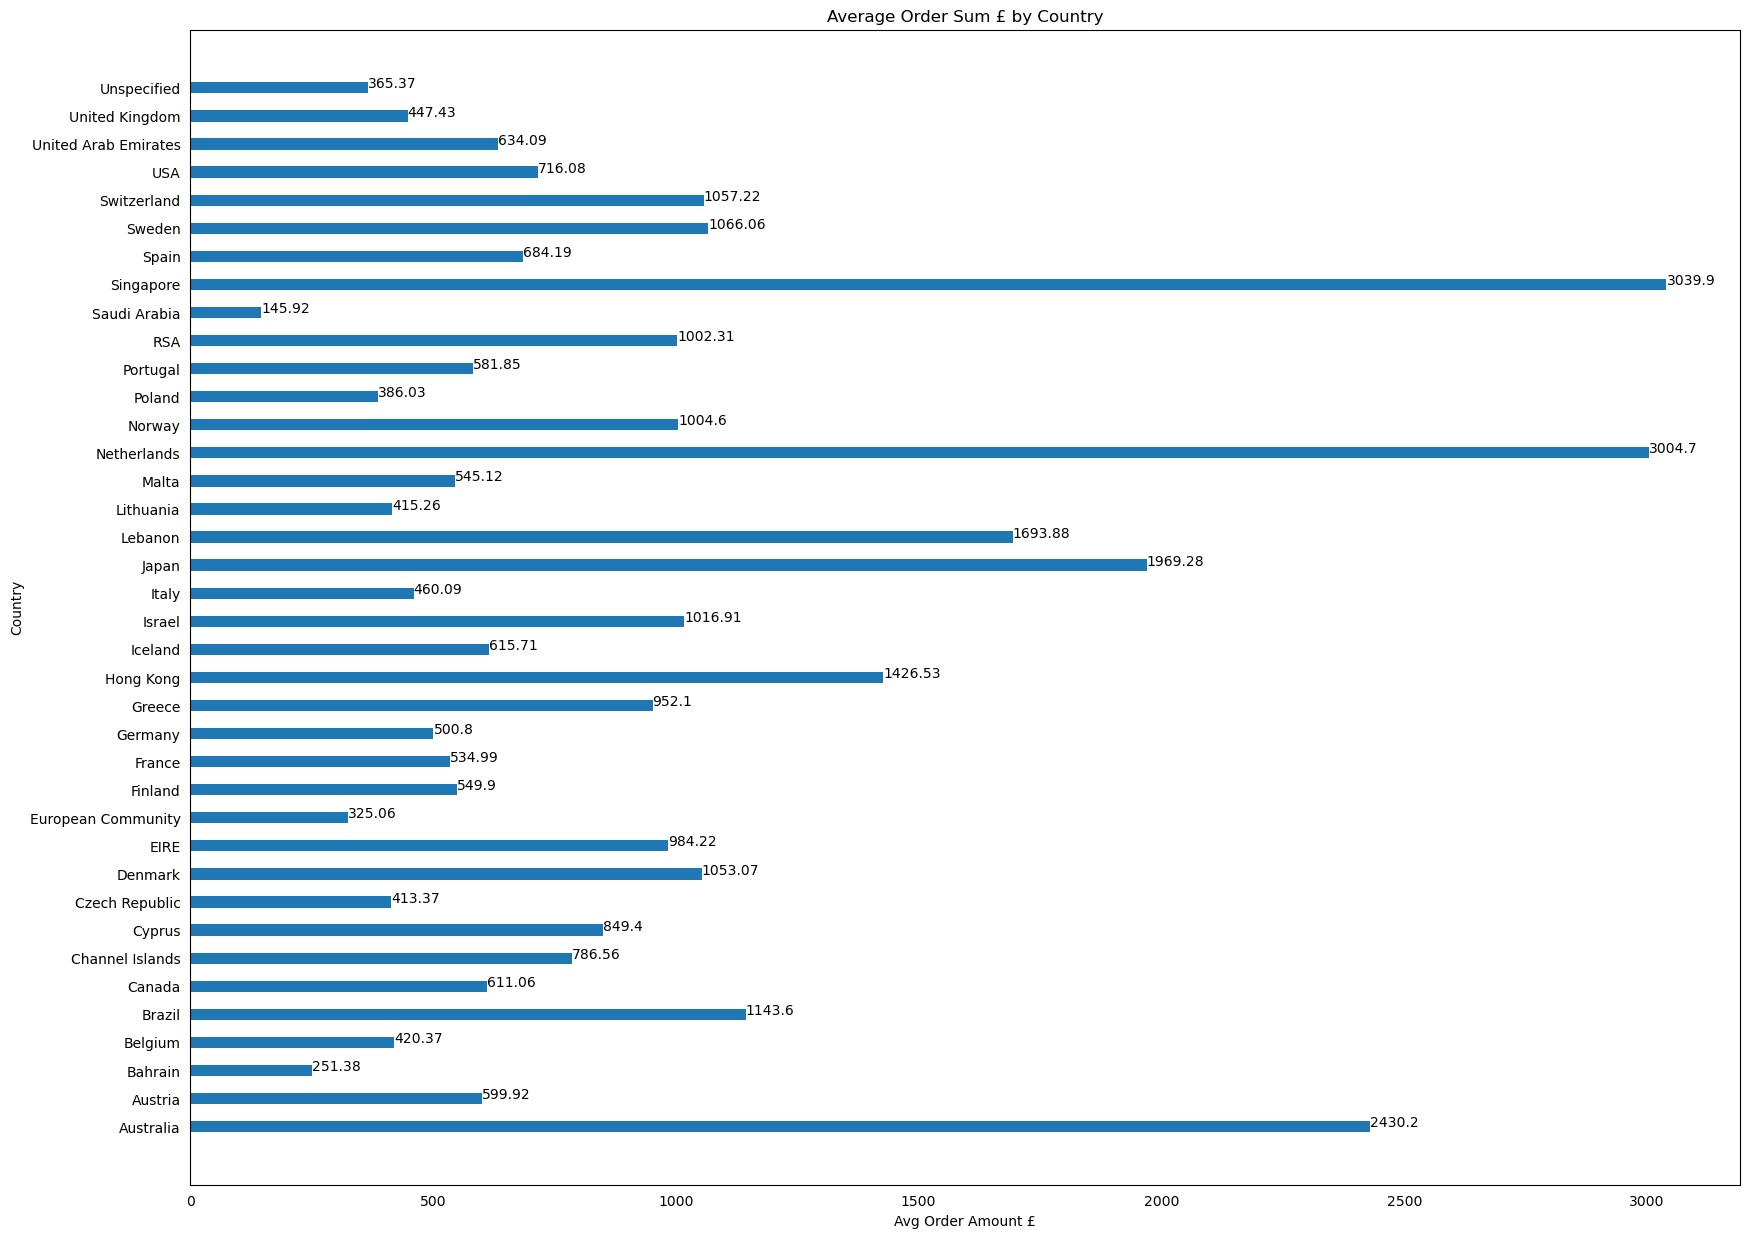

In [18]:
## Create bar char that shows average Order Amount by Country
plt.figure(figsize = (20,15))
plt.barh(avg_order_amount["Country"], avg_order_amount["OrderAmount"], height = 0.4)
plt.xlabel("Avg Order Amount £")
plt.ylabel("Country")
plt.title("Average Order Sum £ by Country")
plt.tick_params(bottom = False, left = False)
for index, value in enumerate(avg_order_amount["OrderAmount"]):
    plt.text(value, index,
             str(value))
plt.show

In [19]:
## Create a new column with InvoiceDate as DateTime
ecommerce_df["MonthYear"] = pd.to_datetime(ecommerce_df.InvoiceDate)
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [20]:
## Confirm new column has the correct datatype
ecommerce_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
OrderAmount           float64
MonthYear      datetime64[ns]
dtype: object

In [21]:
## Convert MonthYear column to YYYY-MM
ecommerce_df["MonthYear"] = ecommerce_df["MonthYear"].dt.to_period('M')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [22]:
## Create a new dataframe that sums OrderAmount by MonthYear
monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]
monthly_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/3274442770.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]


MonthYear
2010-12    823746.140
2011-01    691364.560
2011-02    523631.890
2011-03    717639.360
2011-04    537808.621
Freq: M, Name: OrderAmount, dtype: float64

In [23]:
## Convert MonthYear period index to string before plotting grid
monthly_order_amount_df.index = monthly_order_amount_df.index.astype(str)

<function matplotlib.pyplot.show(close=None, block=None)>

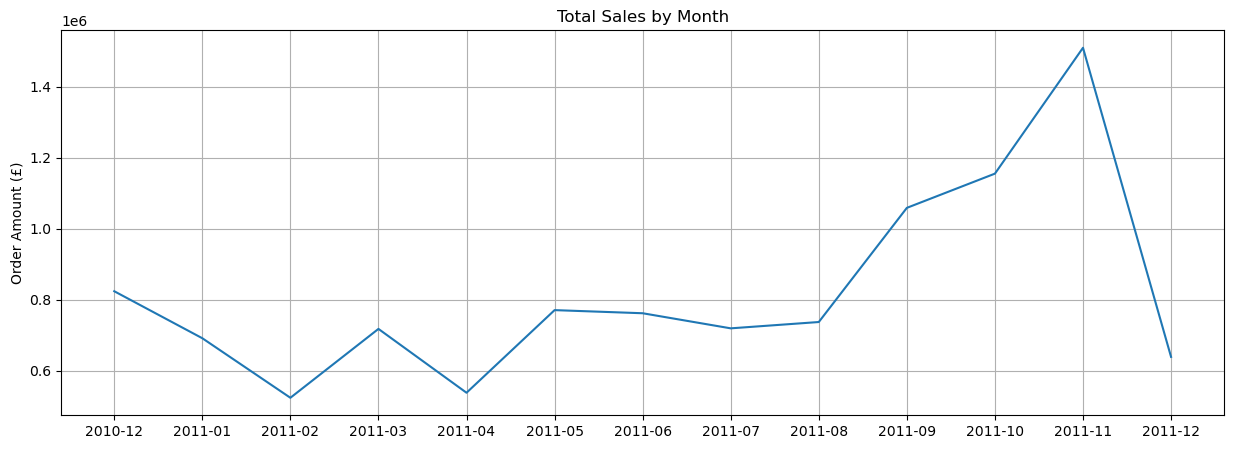

In [24]:
## Create a graph to display total OrderAmount by MonthYear
plt.figure(figsize=(15,5))
plt.plot(monthly_order_amount_df)
plt.grid(True)
plt.title("Total Sales by Month")
plt.ylabel("Order Amount (£)")
plt.show

In [25]:
## Create a new Column Date from Invoice Date
ecommerce_df["Date"] = pd.to_datetime(ecommerce_df.InvoiceDate)
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00


In [26]:
## Create new column to show weekday of Order
ecommerce_df["Weekday"] = ecommerce_df["Date"]
ecommerce_df["Weekday"] = ecommerce_df["Weekday"].dt.strftime('%A')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear,Date,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01 08:26:00,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01 08:26:00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00,Wednesday


In [27]:
# Convert Date column to YYYY-MM-DD
ecommerce_df["Date"] = ecommerce_df["Date"].dt.to_period('D')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear,Date,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday


In [28]:
## Create a new dataframe to count the number of Orders (InvoiceNo) by Weekday 
weekday_count_df = ecommerce_df.groupby("Weekday")["InvoiceNo"].nunique()
weekday_count_df.index = pd.Categorical(weekday_count_df.index, categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
weekday_count_df = weekday_count_df.sort_index()
weekday_count_df = weekday_count_df.reset_index()
weekday_count_df.rename(columns={"index":"Weekday"})
weekday_count_df

,index,InvoiceNo
0,Monday,3420
1,Tuesday,3973
2,Wednesday,4142
3,Thursday,4689
4,Friday,3633
5,Sunday,2207


<function matplotlib.pyplot.show(close=None, block=None)>

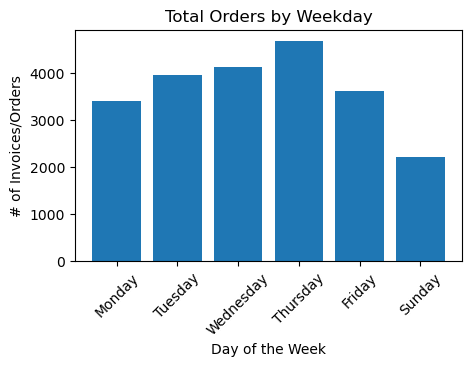

In [29]:
## Create bar char that shows Invoice Count by Weekday
plt.figure(figsize=(5,3))
plt.bar(weekday_count_df["index"], weekday_count_df["InvoiceNo"])
plt.xlabel("Day of the Week")
plt.ylabel("# of Invoices/Orders")
plt.title("Total Orders by Weekday")
plt.xticks(rotation=45)
plt.show

# Time Series Forecasting with Prophet

## Predicting Known Values

In [30]:
## Create a new dataframe that sums OrderAmount by Date
daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]
daily_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/3360653355.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]


Date
2010-12-01    58960.79
2010-12-02    47748.38
2010-12-03    46943.71
2010-12-05    31774.95
2010-12-06    54830.46
Freq: D, Name: OrderAmount, dtype: float64

In [31]:
## Setup forecaster using Prophet to train dataset
forecaster = Prophet()
horizon = 30
daily_forecast_df = daily_order_amount_df

y_train = daily_forecast_df[:-horizon]
y_test = daily_forecast_df.tail(horizon)

## Fit the forecaster
forecaster.fit(y_train)

10:36:14 - cmdstanpy - INFO - Chain [1] start processing
10:36:14 - cmdstanpy - INFO - Chain [1] done processing


Prophet()

In [32]:
## Create a forecaster horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2011-11-06', '2011-11-07', '2011-11-08', '2011-11-09',
             '2011-11-10', '2011-11-11', '2011-11-13', '2011-11-14',
             '2011-11-15', '2011-11-16', '2011-11-17', '2011-11-18',
             '2011-11-20', '2011-11-21', '2011-11-22', '2011-11-23',
             '2011-11-24', '2011-11-25', '2011-11-27', '2011-11-28',
             '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
             '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
             '2011-12-08', '2011-12-09'],
            dtype='period[D]', name='Date', is_relative=False)

In [33]:
## Create Predictions
y_pred = forecaster.predict(fh)
y_pred

Date
2011-11-06    26398.198663
2011-11-07    44783.842954
2011-11-08    51793.335457
2011-11-09    43448.242627
2011-11-10    51494.139576
2011-11-11    43246.318846
2011-11-13    27172.215712
2011-11-14    45557.860003
2011-11-15    52567.352506
2011-11-16    44222.259675
2011-11-17    52268.156625
2011-11-18    44020.335895
2011-11-20    27946.232761
2011-11-21    46331.877052
2011-11-22    53341.369554
2011-11-23    44996.276724
2011-11-24    53042.173674
2011-11-25    44794.352944
2011-11-27    28720.249809
2011-11-28    47105.894101
2011-11-29    54115.386603
2011-11-30    45770.293773
2011-12-01    53816.190722
2011-12-02    45568.369992
2011-12-04    29494.266858
2011-12-05    47879.911149
2011-12-06    54889.403652
2011-12-07    46544.310822
2011-12-08    54590.207771
2011-12-09    46342.387041
Freq: D, Name: OrderAmount, dtype: float64

In [34]:
## Create 90% confidence interval
ci = forecaster.predict_interval(fh, coverage=0.9)
ci.head()

OrderAmount              
                     0.9              
                   lower         upper
Date                                  
2011-11-06   4274.582899  47133.841387
2011-11-07  24058.911092  67689.682186
2011-11-08  29784.887641  73713.986242
2011-11-09  21955.311901  65545.998784
2011-11-10  28661.041920  72985.254249

In [35]:
## Specify y_true to compare if predictions are accurate
y_true = daily_forecast_df.tail(horizon)
y_true

Date
2011-11-06     42946.34
2011-11-07     85881.81
2011-11-08     57700.24
2011-11-09     66127.57
2011-11-10     71008.26
2011-11-11     55257.17
2011-11-13     34069.92
2011-11-14    114419.89
2011-11-15     60807.29
2011-11-16     65958.17
2011-11-17     61103.13
2011-11-18     51275.39
2011-11-20     35058.57
2011-11-21     49805.72
2011-11-22     64089.82
2011-11-23     80104.18
2011-11-24     50978.63
2011-11-25     50822.73
2011-11-27     20611.08
2011-11-28     57165.19
2011-11-29     72595.93
2011-11-30     60126.96
2011-12-01     52197.25
2011-12-02     57664.07
2011-12-04     24621.43
2011-12-05     88741.96
2011-12-06     56713.21
2011-12-07     75439.16
2011-12-08     82495.00
2011-12-09    200920.60
Freq: D, Name: OrderAmount, dtype: float64

In [36]:
## Check mean_error of predictions and true values
mean_error = mean_absolute_error(y_true, y_pred)
mean_error

20925.80795284165

In [37]:
## Convert period indexes to string before plotting grid
daily_forecast_df.index = daily_forecast_df.index.astype(str)
y_true.index = y_true.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

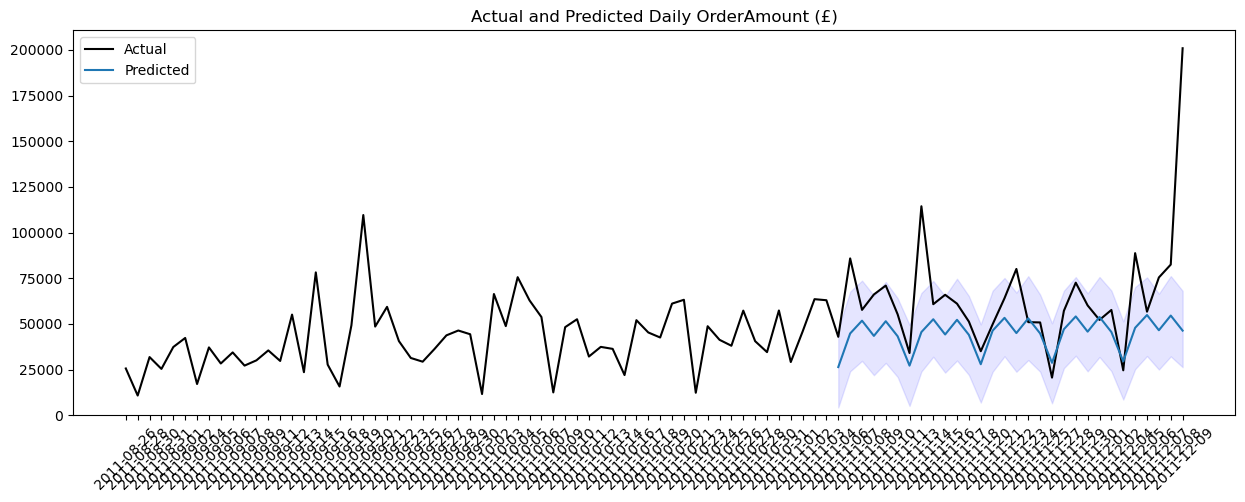

In [38]:
## Plot comparison of predictions and true values
plt.figure(figsize=(15,5))
plt.plot(
    daily_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Actual and Predicted Daily OrderAmount (£)")
plt.show()
plt.show()

In [39]:
## dataframe that sums OrderAmount by MonthYear
monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]
monthly_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/3126133268.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]


MonthYear
2010-12    823746.140
2011-01    691364.560
2011-02    523631.890
2011-03    717639.360
2011-04    537808.621
Freq: M, Name: OrderAmount, dtype: float64

In [40]:
## Setup Forecaster to train dataset for Monthly data
forecaster = Prophet()
horizon = 2
monthly_forecast_df = monthly_order_amount_df

y_train = monthly_forecast_df[:-horizon]
y_test = monthly_forecast_df.tail(horizon)

## Fit the forecaster
forecaster.fit(y_train)

## Create forecast horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

## Create predictions
y_pred = forecaster.predict(fh)

## Create 90% confidence interval
ci = forecaster.predict_interval(fh, coverage=0.9)

## Specify y_true to compare if predictions are accurate
y_true = monthly_forecast_df.tail(horizon)

10:36:26 - cmdstanpy - INFO - Chain [1] start processing
10:36:27 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
## Check mean_error of predictions and true values
mean_error = mean_absolute_error(y_true, y_pred)
mean_error

453274.3347624081

In [42]:
## Convert period indexes to string before plotting grid
monthly_forecast_df.index = monthly_forecast_df.index.astype(str)
y_true.index = y_true.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

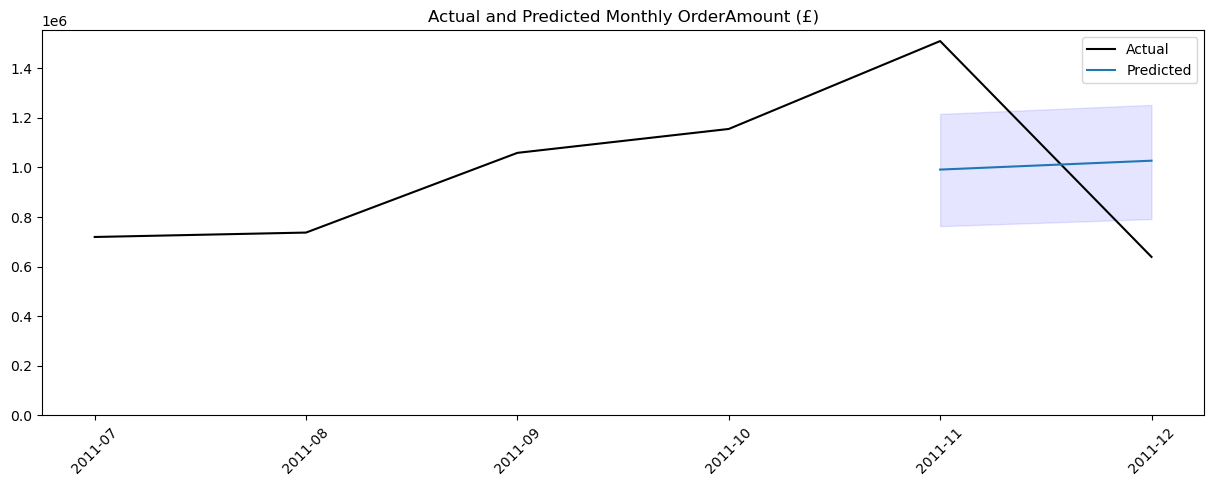

In [43]:
## Plot comparison of predictions and true values
plt.figure(figsize=(15,5))
plt.plot(
    monthly_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Actual and Predicted Monthly OrderAmount (£)")
plt.show()
plt.show()

## Time Series Forecasting to Predict Future Values - Daily

In [44]:
## dataframe that sums OrderAmount by Date
daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]
daily_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/1084831159.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]


Date
2010-12-01    58960.79
2010-12-02    47748.38
2010-12-03    46943.71
2010-12-05    31774.95
2010-12-06    54830.46
Freq: D, Name: OrderAmount, dtype: float64

In [45]:
## Setup forecaster, horizon, frequency
forecaster = Prophet()
horizon = 30
daily_forecast_df = daily_order_amount_df
forecaster.fit(daily_forecast_df)
last_date = daily_forecast_df.index.max()
fh = ForecastingHorizon(
    pd.date_range(str(last_date), periods=horizon, freq="D"),
    is_relative=False,
)

10:36:33 - cmdstanpy - INFO - Chain [1] start processing
10:36:33 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
## Check the last_date of the forecast dataframe
last_date

Period('2011-12-09', 'D')

In [47]:
## Create predictions and confidence interval
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")

In [48]:
## Convert period indexes to string before plotting grid
daily_forecast_df.index = daily_forecast_df.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

In [49]:
## Review predictions
y_pred

2011-12-09    65046.203149
2011-12-10    77413.070544
2011-12-11    46068.554050
2011-12-12    67585.637583
2011-12-13    72311.442292
2011-12-14    65550.204577
2011-12-15    72397.170115
2011-12-16    67049.938454
2011-12-17    79416.805849
2011-12-18    48072.289355
2011-12-19    69589.372888
2011-12-20    74315.177597
2011-12-21    67553.939882
2011-12-22    74400.905420
2011-12-23    69053.673759
2011-12-24    81420.541154
2011-12-25    50076.024660
2011-12-26    71593.108193
2011-12-27    76318.912902
2011-12-28    69557.675187
2011-12-29    76404.640725
2011-12-30    71057.409064
2011-12-31    83424.276459
2012-01-01    52079.759965
2012-01-02    73596.843498
2012-01-03    78322.648207
2012-01-04    71561.410492
2012-01-05    78408.376029
2012-01-06    73061.144369
2012-01-07    85428.011763
Name: OrderAmount, dtype: float64

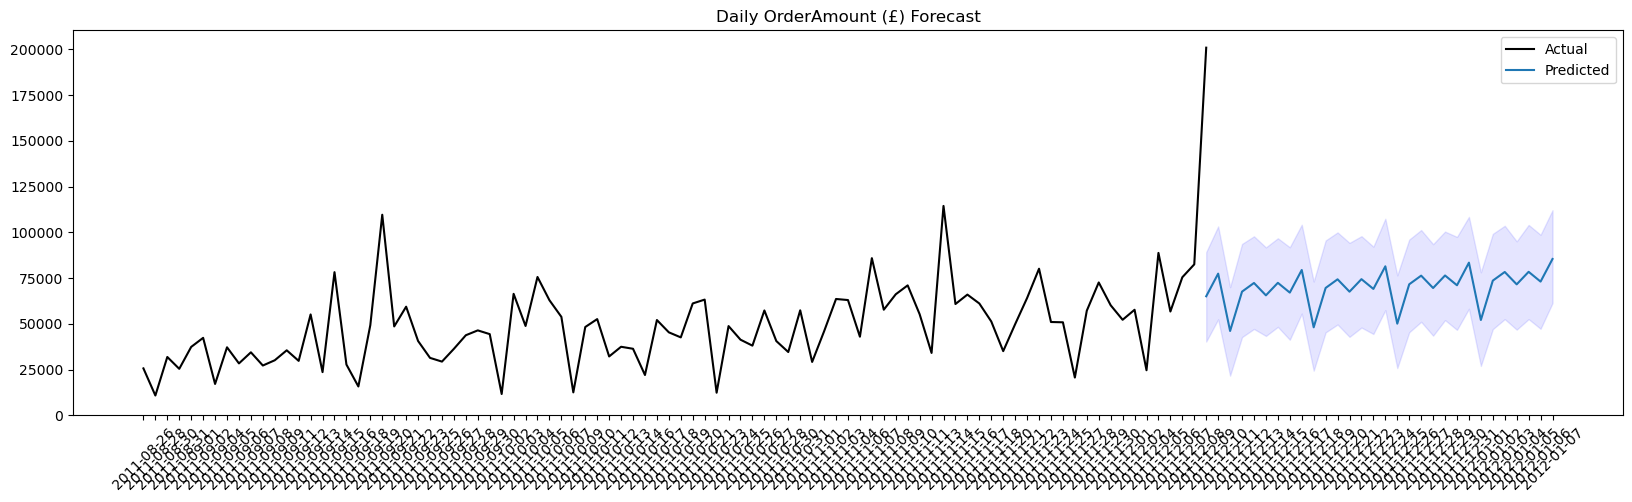

In [50]:
## Plot comparison of predictions and true values
plt.figure(figsize=(20,5))
plt.plot(
    daily_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Daily OrderAmount (£) Forecast")
plt.show()
plt.show()

## Time Series Forecasting to Predict Future Values - Monthly

In [51]:
## dataframe that sums OrderAmount by MonthYear
monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]
monthly_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_5738/3126133268.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]


MonthYear
2010-12    823746.140
2011-01    691364.560
2011-02    523631.890
2011-03    717639.360
2011-04    537808.621
Freq: M, Name: OrderAmount, dtype: float64

In [52]:
## Setup Forecaster for Monthly data
forecaster = Prophet()
horizon = 2
monthly_forecast_df = monthly_order_amount_df
forecaster.fit(monthly_forecast_df)
last_date = monthly_forecast_df.index.max()
fh = ForecastingHorizon(pd.PeriodIndex(
    pd.date_range(str(last_date), periods=horizon, freq="M")), is_relative=False)

## Create predictions and confidence interval
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")


10:36:40 - cmdstanpy - INFO - Chain [1] start processing
10:36:40 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
## Convert period indexes to string before plotting grid
monthly_forecast_df.index = monthly_forecast_df.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

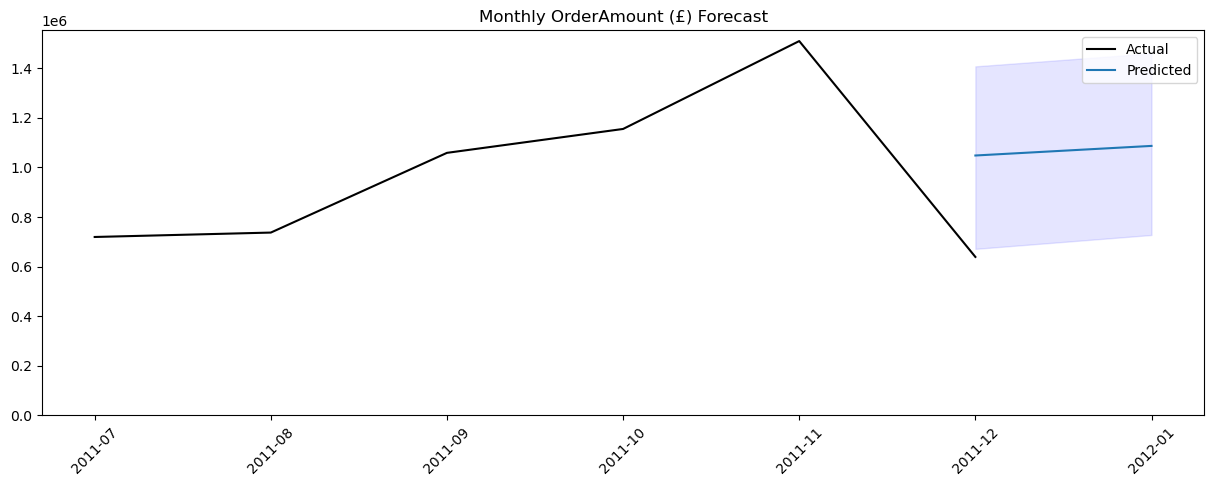

In [54]:
## Plot comparison of predictions and true values
plt.figure(figsize=(15,5))
plt.plot(
    monthly_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Monthly OrderAmount (£) Forecast")
plt.show()
plt.show()

In [55]:
## Download as csv
ecommerce_df.to_csv('DataSource/ecommerce_df.csv')